In [12]:
import geopandas as gpd

In [13]:
fp = "C:/Users/aelea/MSGIS_project22/kenya_administrative_district_boundaries/kenya_administrative_district_boundaries.shp"

In [14]:
geo_data = gpd.read_file(fp)

In [16]:
geo_data.head()

,distid,distname,geometry
0,101.0,NAIROBI,"POLYGON ((36.90575 -1.15905, 36.91035 -1.15935..."
1,401.0,EMBU,"POLYGON ((37.56145 -0.36535, 37.56435 -0.36545..."
2,402.0,ISIOLO,"POLYGON ((39.08995 1.90225, 39.09425 1.90005, ..."
3,403.0,KITUI,"POLYGON ((38.57375 -1.05805, 38.57705 -1.06025..."
4,201.0,KIAMBU,"POLYGON ((36.68825 -0.76455, 36.69175 -0.76685..."


<AxesSubplot:>

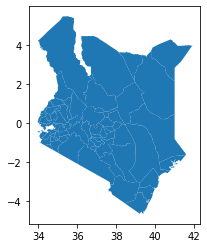

In [17]:
geo_data.plot()

In [18]:
geo_data.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [11]:
import pandas as pd

In [33]:
table_data = pd.read_csv("C:/Users/aelea/MSGIS_project22/districts2.csv")

In [34]:
table_data.head(5)

,OID_,distid,distname,Cases,Lab_Confirmed,Deaths,CFR,onset_date,last_new_case
0,1,101.0,NAIROBI,361.0,98.0,31.0,9.0,6/24/2009 0:00:00,6/28/2009 0:00:00
1,2,401.0,EMBU,NaN,NaN,NaN,NaN,NaN,NaN
2,3,402.0,ISIOLO,772.0,32.0,29.0,3.7,3/21/2009 0:00:00,7/13/2009 0:00:00
3,4,403.0,KITUI,1854.0,2.0,15.0,0.8,9/19/2009 0:00:00,11/21/2009 0:00:00
4,5,201.0,KIAMBU,61.0,4.0,7.0,11.5,11/12/2009 0:00:00,12/14/2009 0:00:00


In [35]:
df1 = geo_data.merge(table_data,how="outer",on="distname")

In [36]:
df1.head(5)

,distid_x,distname,geometry,OID_,distid_y,Cases,Lab_Confirmed,Deaths,CFR,onset_date,last_new_case
0,101.0,NAIROBI,"POLYGON ((36.90575 -1.15905, 36.91035 -1.15935...",1,101.0,361.0,98.0,31.0,9.0,6/24/2009 0:00:00,6/28/2009 0:00:00
1,401.0,EMBU,"POLYGON ((37.56145 -0.36535, 37.56435 -0.36545...",2,401.0,NaN,NaN,NaN,NaN,NaN,NaN
2,402.0,ISIOLO,"POLYGON ((39.08995 1.90225, 39.09425 1.90005, ...",3,402.0,772.0,32.0,29.0,3.7,3/21/2009 0:00:00,7/13/2009 0:00:00
3,403.0,KITUI,"POLYGON ((38.57375 -1.05805, 38.57705 -1.06025...",4,403.0,1854.0,2.0,15.0,0.8,9/19/2009 0:00:00,11/21/2009 0:00:00
4,201.0,KIAMBU,"POLYGON ((36.68825 -0.76455, 36.69175 -0.76685...",5,201.0,61.0,4.0,7.0,11.5,11/12/2009 0:00:00,12/14/2009 0:00:00


<AxesSubplot:>

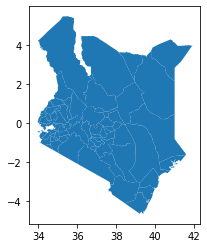

In [37]:
df1.plot()

In [39]:
print(df1.crs)

epsg:4326


In [40]:
df1.columns

Index(['distid_x', 'distname', 'geometry', 'OID_', 'distid_y', 'Cases',
       'Lab_Confirmed', 'Deaths', 'CFR', 'onset_date', 'last_new_case'],
      dtype='object')

In [41]:
df1.tail(5)

,distid_x,distname,geometry,OID_,distid_y,Cases,Lab_Confirmed,Deaths,CFR,onset_date,last_new_case
64,804.0,KAKAMEGA,"POLYGON ((34.89825 0.60025, 34.89205 0.59295, ...",65,804.0,30.0,13.0,2.0,6.6,3/11/2009 0:00:00,3/23/2009 0:00:00
65,805.0,LUGARI,"POLYGON ((35.05235 0.90195, 35.05495 0.90015, ...",66,805.0,NaN,NaN,NaN,NaN,NaN,NaN
66,806.0,TESO,"POLYGON ((34.37035 0.77085, 34.37405 0.77005, ...",67,806.0,NaN,NaN,NaN,NaN,NaN,NaN
67,807.0,VIHIGA,"POLYGON ((34.90335 0.19885, 34.90465 0.19685, ...",68,807.0,NaN,NaN,NaN,NaN,NaN,NaN
68,808.0,BUTERE/MUMIAS,"POLYGON ((34.49405 0.46995, 34.49555 0.46665, ...",69,808.0,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
df2 = df1.rename(columns={'distid_x':'ID','Cases':'cases','Lab_Confirmed':'confirmed','Deaths':'deaths'})

In [45]:
df2.sort_values(by="cases",ascending=False)

,ID,distname,geometry,OID_,distid_y,cases,confirmed,deaths,CFR,onset_date,last_new_case
57,715.0,TURKANA,"POLYGON ((35.65415 5.43215, 35.66435 5.43205, ...",58,715.0,3213.0,56.0,56.0,1.7,8/8/2009 0:00:00,12/28/2009 0:00:00
3,403.0,KITUI,"POLYGON ((38.57375 -1.05805, 38.57705 -1.06025...",4,403.0,1854.0,2.0,15.0,0.8,9/19/2009 0:00:00,11/21/2009 0:00:00
7,406.0,MARSABIT,"POLYGON ((36.64075 4.44835, 36.64775 4.44725, ...",8,406.0,1131.0,2.0,17.0,1.5,5/12/2009 0:00:00,11/16/2009 0:00:00
2,402.0,ISIOLO,"POLYGON ((39.08995 1.90225, 39.09425 1.90005, ...",3,402.0,772.0,32.0,29.0,3.7,3/21/2009 0:00:00,7/13/2009 0:00:00
23,409.0,MOYALE,"POLYGON ((38.52715 3.65445, 38.53065 3.65415, ...",24,409.0,559.0,19.0,10.0,1.7,1/30/2009 0:00:00,6/16/2009 0:00:00
...,...,...,...,...,...,...,...,...,...,...,...
63,803.0,MT ELGON,"POLYGON ((34.61925 1.10095, 34.62205 1.09865, ...",64,803.0,NaN,NaN,NaN,NaN,NaN,NaN
65,805.0,LUGARI,"POLYGON ((35.05235 0.90195, 35.05495 0.90015, ...",66,805.0,NaN,NaN,NaN,NaN,NaN,NaN
66,806.0,TESO,"POLYGON ((34.37035 0.77085, 34.37405 0.77005, ...",67,806.0,NaN,NaN,NaN,NaN,NaN,NaN
67,807.0,VIHIGA,"POLYGON ((34.90335 0.19885, 34.90465 0.19685, ...",68,807.0,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
type(df2)

geopandas.geodataframe.GeoDataFrame

In [51]:
df3 = df2.drop(columns=['OID_','distid_y','ID'])

In [52]:
df3.head()

,distname,geometry,cases,confirmed,deaths,CFR,onset_date,last_new_case
0,NAIROBI,"POLYGON ((36.90575 -1.15905, 36.91035 -1.15935...",361.0,98.0,31.0,9.0,6/24/2009 0:00:00,6/28/2009 0:00:00
1,EMBU,"POLYGON ((37.56145 -0.36535, 37.56435 -0.36545...",NaN,NaN,NaN,NaN,NaN,NaN
2,ISIOLO,"POLYGON ((39.08995 1.90225, 39.09425 1.90005, ...",772.0,32.0,29.0,3.7,3/21/2009 0:00:00,7/13/2009 0:00:00
3,KITUI,"POLYGON ((38.57375 -1.05805, 38.57705 -1.06025...",1854.0,2.0,15.0,0.8,9/19/2009 0:00:00,11/21/2009 0:00:00
4,KIAMBU,"POLYGON ((36.68825 -0.76455, 36.69175 -0.76685...",61.0,4.0,7.0,11.5,11/12/2009 0:00:00,12/14/2009 0:00:00


In [53]:
type(df3)

geopandas.geodataframe.GeoDataFrame

<AxesSubplot:>

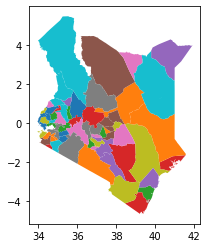

In [54]:
df3.plot(column="distname")

<AxesSubplot:>

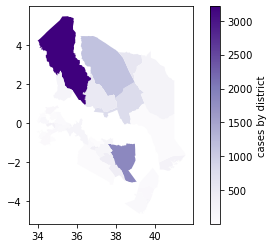

In [68]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1)
df3.plot(column = "cases",
         ax=ax,
         cmap="Purples",
         legend = True,
         legend_kwds={"label":"cases by district"})

<AxesSubplot:>

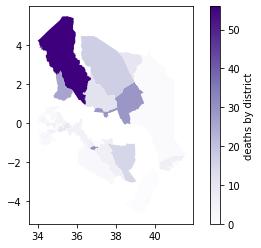

In [72]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1)
df3.plot(column = "deaths",
         ax=ax,
         cmap="Purples",
         legend = True,
         legend_kwds={"label":"deaths by district"})

<AxesSubplot:>

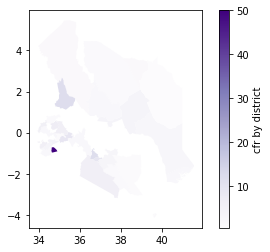

In [73]:
fig, ax = plt.subplots(1,1)
df3.plot(column = "CFR",
         ax=ax,
         cmap="Purples",
         legend = True,
         legend_kwds={"label":"cfr by district"})

In [91]:
fig, ax = plt.subplots(1,1)
df3.plot(column = "confirmed",
         ax=ax,
         cmap="Purples",
         legend = True,
         legend_kwds={"label":"lab-confirmed cases by district"})

SyntaxError: positional argument follows keyword argument (2459081438.py, line 7)

In [77]:
df3 = df3.to_crs(epsg=3857)

In [83]:
import contextily as cx

In [84]:
cx.add_basemap(ax)

C:\Users\aelea\anaconda3\lib\site-packages\contextily\tile.py:581: UserWarning: The inferred zoom level of 24 is not valid for the current tile provider (valid zooms: 0 - 18).
  warnings.warn(msg)


<Figure size 432x288 with 0 Axes>

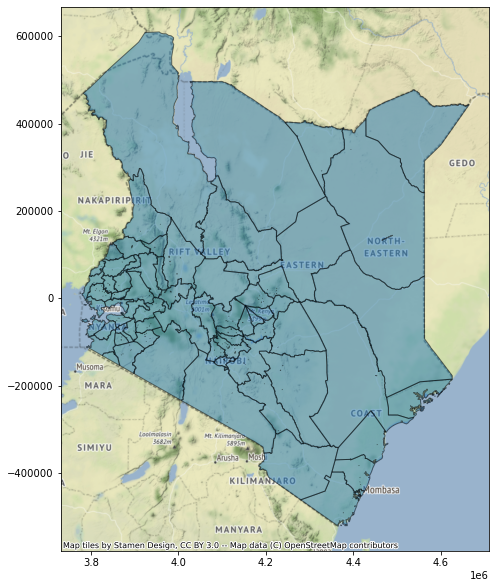

In [99]:
ax = df3.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
cx.add_basemap(ax)

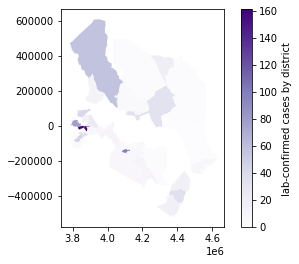

In [94]:
fig, ax = plt.subplots(1,1)
df4 = df3.plot(column = "confirmed",
         ax=ax,
         cmap="Purples",
         legend = True,
         legend_kwds={"label":"lab-confirmed cases by district"})

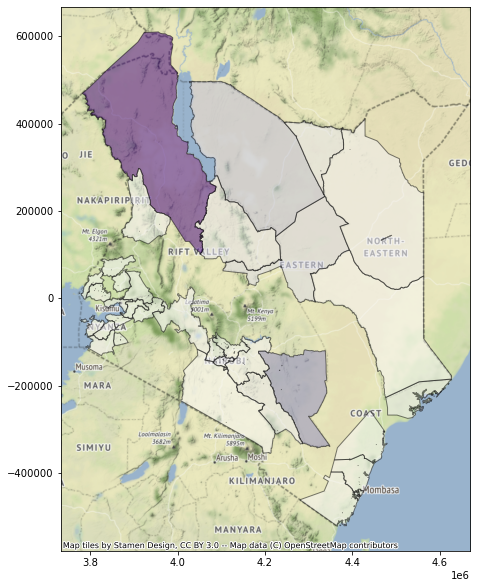

In [102]:
df4 = df3.plot(figsize=(10, 10),
              alpha=0.5,
               column = "cases",
               cmap="Purples",
              edgecolor='k'
             )
cx.add_basemap(df4)

In [104]:
df3.value_counts()

TypeError: '<' not supported between instances of 'MultiPolygon' and 'Polygon'

In [221]:
print("Cases Mean: {}".format(df3['cases'].mean()))
print("Cases Median: {}".format(df3['cases'].median()))
print("Cases Max: {}".format(df3['cases'].max()))
print("Cases Min: {}".format(df3['cases'].min()))
print("Deaths Mean: {}".format(df3['deaths'].mean()))
print("Deaths Median: {}".format(df3['deaths'].median()))
print("Deaths Max: {}".format(df3['deaths'].max()))
print("Deaths Min: {}".format(df3['deaths'].min()))

Cases Mean: 345.8529411764706
Cases Median: 122.5
Cases Max: 3213.0
Cases Min: 2.0
Deaths Mean: 8.058823529411764
Deaths Median: 4.0
Deaths Max: 56.0
Deaths Min: 0.0


In [220]:
print("CFR Mean: {}".format(df3['CFR'].max()))
print("CFR Median: {}".format(df3['CFR'].min()))

CFR Mean: 50.0
CFR Median: 0.4


In [114]:
import seaborn as sns

C:\Users\aelea\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cases'>

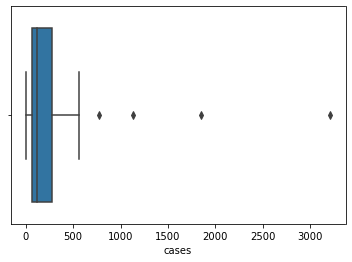

In [117]:
sns.boxplot(df3['cases'])

C:\Users\aelea\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='deaths'>

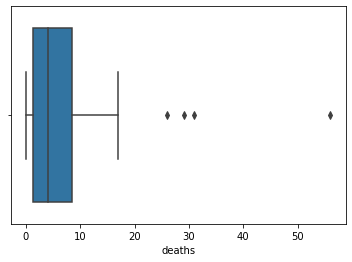

In [118]:
sns.boxplot(df3['deaths'])

C:\Users\aelea\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='confirmed'>

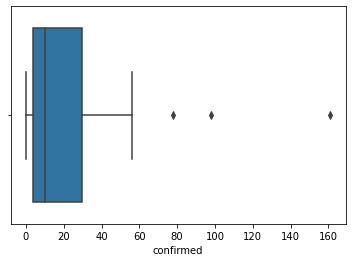

In [119]:
sns.boxplot(df3['confirmed'])

C:\Users\aelea\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CFR'>

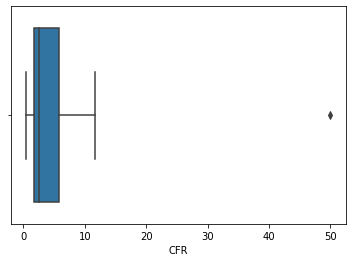

In [120]:
sns.boxplot(df3['CFR'])

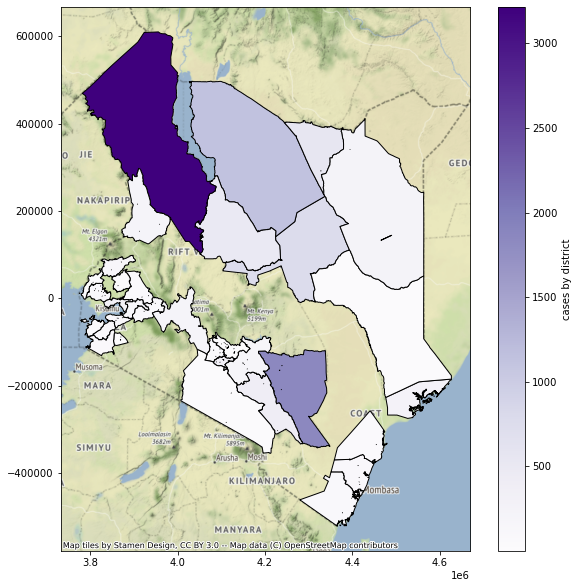

In [124]:
df4 = df3.plot(figsize=(10, 10),
               column = "cases",
               cmap="Purples",
               legend = True,
              legend_kwds={"label":"cases by district"})
cx.add_basemap(df4)

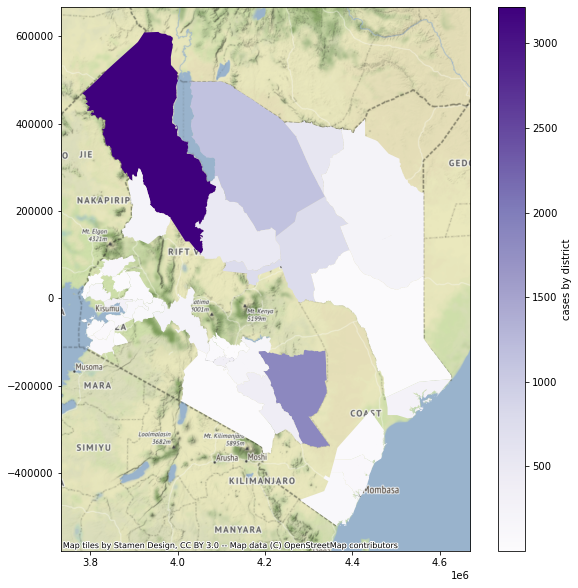

In [125]:
df4 = df3.plot(figsize=(10, 10),
               column = "cases",
               cmap="Purples",
               legend = True,
              legend_kwds={"label":"cases by district"})
cx.add_basemap(df4)

In [133]:
df3.plot(figsize=(10, 10),
               column = "cases",
               cmap="Purples",
               plt.annotate(s=row['distname'])

SyntaxError: positional argument follows keyword argument (281469107.py, line 4)

In [155]:
df3['coords'] = df3['geometry'].apply(lambda x: x.representative_point().coords[:])
df3['coords'] = [coords[0] for coords in df3['coords']]

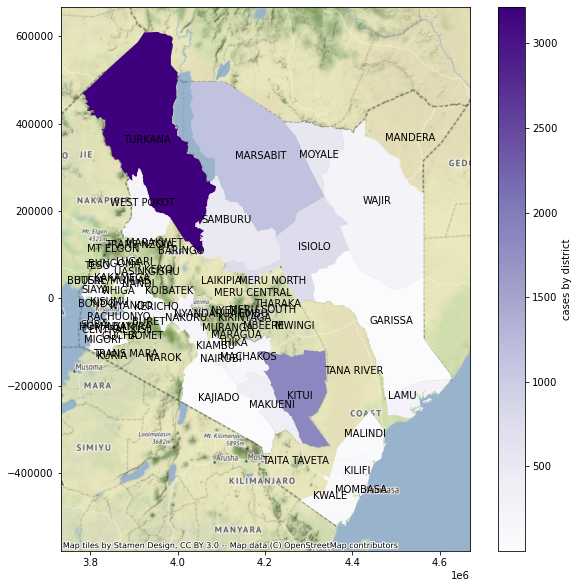

In [157]:
df4 = df3.plot(figsize=(10, 10),
               column = "cases",
               cmap="Purples",
               legend = True,
              legend_kwds={"label":"cases by district"})
cx.add_basemap(df4)
for idx, row in df3.iterrows():
    plt.annotate(text=row['distname'], xy=row['coords'],
                 horizontalalignment='center')

In [173]:
fp1 = "C:/Users/aelea/MSGIS_project22/turkana.geojson"

In [174]:
turkana_data = gpd.read_file(fp1)

In [175]:
turkana_data.head()

,name,geoid_int,place_type,state,geometry
0,Turkana North,None,None,None,"MULTIPOLYGON (((34.59591 2.91777, 34.70631 2.9..."
1,Turkana Central,None,None,None,"MULTIPOLYGON (((35.79965 3.60512, 35.93855 3.5..."
2,Turkana South,None,None,None,"MULTIPOLYGON (((36.38372 2.83942, 36.44782 2.7..."


<AxesSubplot:>

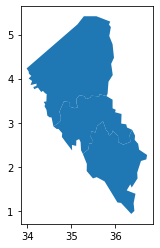

In [176]:
turkana_data.plot()

In [217]:
turk1 = turkana_data.rename(columns={'geoid_int':'cases','place_type':'deaths','state':'CFR'})

In [178]:
turk1.head()

,name,cases,deaths,cfr,geometry
0,Turkana North,None,None,None,"MULTIPOLYGON (((34.59591 2.91777, 34.70631 2.9..."
1,Turkana Central,None,None,None,"MULTIPOLYGON (((35.79965 3.60512, 35.93855 3.5..."
2,Turkana South,None,None,None,"MULTIPOLYGON (((36.38372 2.83942, 36.44782 2.7..."


In [183]:
turk2 = turk1.assign(cases=[406,1314,1493])

In [185]:
turk2 = turk2.assign(deaths=[6,34,16])

In [218]:
turk2 = turk2.assign(CFR=[1.5,2.6,1])

In [187]:
turk2.head()

,name,cases,deaths,cfr,geometry
0,Turkana North,406,6,1.5,"MULTIPOLYGON (((34.59591 2.91777, 34.70631 2.9..."
1,Turkana Central,1314,34,2.6,"MULTIPOLYGON (((35.79965 3.60512, 35.93855 3.5..."
2,Turkana South,1493,16,1.0,"MULTIPOLYGON (((36.38372 2.83942, 36.44782 2.7..."


<AxesSubplot:>

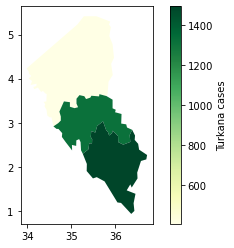

In [192]:
fig, ax = plt.subplots(1,1)
turk2.plot(column = "cases",
         ax=ax,
         cmap="YlGn",
         legend = True,
         legend_kwds={"label":"Turkana cases"})

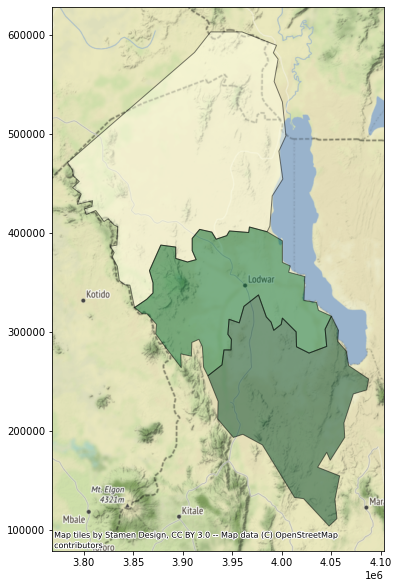

In [204]:
turk3 = turk2.plot(figsize=(10, 10),
              alpha=0.5,
               column = "cases",
               cmap="YlGn",
              edgecolor='k'
             )
cx.add_basemap(turk3)

In [203]:
turk2 = turk2.to_crs(epsg=3857)

In [206]:
final1 = df3.append(turk2)

C:\Users\aelea\AppData\Local\Temp\ipykernel_6008\1984513056.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final1 = df3.append(turk2)


In [207]:
final1.tail()

,distname,geometry,cases,confirmed,deaths,CFR,onset_date,last_new_case,coords,name,cfr
67,VIHIGA,"POLYGON ((3885423.676 22135.807, 3885568.391 2...",NaN,NaN,NaN,NaN,NaN,NaN,"(3863740.891775609, 9345.156275837342)",NaN,NaN
68,BUTERE/MUMIAS,"POLYGON ((3839860.608 52315.063, 3840027.587 5...",NaN,NaN,NaN,NaN,NaN,NaN,"(3841974.73326841, 32004.369595636184)",NaN,NaN
0,NaN,"MULTIPOLYGON (((3851199.234 324945.469, 386348...",406.0,NaN,6.0,NaN,NaN,NaN,NaN,Turkana North,1.5
1,NaN,"MULTIPOLYGON (((3985199.188 401584.828, 400066...",1314.0,NaN,34.0,NaN,NaN,NaN,NaN,Turkana Central,2.6
2,NaN,"MULTIPOLYGON (((4050216.918 316212.559, 405735...",1493.0,NaN,16.0,NaN,NaN,NaN,NaN,Turkana South,1.0


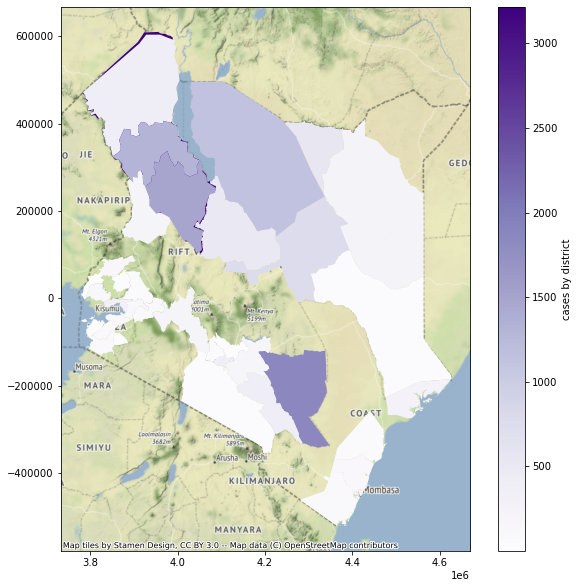

In [208]:
final2 = final1.plot(figsize=(10, 10),
               column = "cases",
               cmap="Purples",
               legend = True,
              legend_kwds={"label":"cases by district"})
cx.add_basemap(final2)

In [209]:
print(df3.crs)

epsg:3857


In [210]:
print(turk2.crs)

epsg:3857


In [212]:
final1.max()

C:\Users\aelea\AppData\Local\Temp\ipykernel_6008\115713496.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  final1.max()


cases        3213.0
confirmed     161.0
deaths         56.0
CFR            50.0
cfr             2.6
dtype: float64

In [225]:
final1.sort_values(by="deaths",ascending=False)

,distname,geometry,cases,confirmed,deaths,CFR,onset_date,last_new_case,coords,name,cfr
57,TURKANA,"POLYGON ((3969002.349 605612.014, 3970137.808 ...",3213.0,56.0,56.0,1.7,8/8/2009 0:00:00,12/28/2009 0:00:00,"(3929502.5294290893, 356223.6264582241)",NaN,NaN
1,NaN,"MULTIPOLYGON (((3985199.188 401584.828, 400066...",1314.0,NaN,34.0,NaN,NaN,NaN,NaN,Turkana Central,2.6
0,NAIROBI,"POLYGON ((4108329.824 -129033.775, 4108841.894...",361.0,98.0,31.0,9.0,6/24/2009 0:00:00,6/28/2009 0:00:00,"(4099632.8993351483, -144739.00949526133)",NaN,NaN
2,ISIOLO,"POLYGON ((4351473.856 211796.296, 4351952.530 ...",772.0,32.0,29.0,3.7,3/21/2009 0:00:00,7/13/2009 0:00:00,"(4313643.274950502, 111881.70773550845)",NaN,NaN
59,WEST POKOT,"POLYGON ((3920211.017 278893.945, 3920133.093 ...",224.0,12.0,26.0,11.7,11/20/2009 0:00:00,12/23/2009 0:00:00,"(3919061.082341489, 211022.20105899806)",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
63,MT ELGON,"POLYGON ((3853797.808 122564.618, 3854109.503 ...",NaN,NaN,NaN,NaN,NaN,NaN,"(3851993.391066952, 107127.66427928876)",NaN,NaN
65,LUGARI,"POLYGON ((3902010.280 100408.644, 3902299.710 ...",NaN,NaN,NaN,NaN,NaN,NaN,"(3899973.747983353, 76884.54993369337)",NaN,NaN
66,TESO,"POLYGON ((3826090.387 85813.100, 3826502.269 8...",NaN,NaN,NaN,NaN,NaN,NaN,"(3816712.9330939734, 68290.1280541574)",NaN,NaN
67,VIHIGA,"POLYGON ((3885423.676 22135.807, 3885568.391 2...",NaN,NaN,NaN,NaN,NaN,NaN,"(3863740.891775609, 9345.156275837342)",NaN,NaN


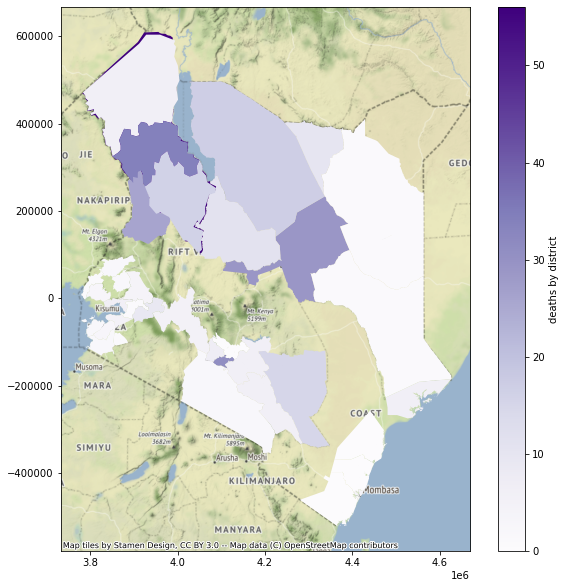

In [215]:
final2 = final1.plot(figsize=(10, 10),
               column = "deaths",
               cmap="Purples",
               legend = True,
              legend_kwds={"label":"deaths by district"})
cx.add_basemap(final2)

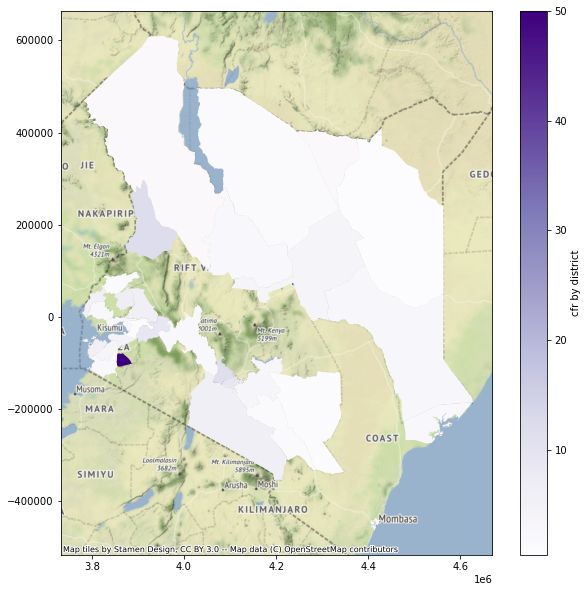

In [219]:
final2 = final1.plot(figsize=(10, 10),
               column = "CFR",
               cmap="Purples",
               legend = True,
              legend_kwds={"label":"cfr by district"})
cx.add_basemap(final2)